In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
print(tf.__version__)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder #Used for converting labels to numbers(0 or 1)
dataset = pd.read_csv('N225_clean.csv')
dataset.head()
x = dataset.drop(labels=['Date','High','Low','Close', 'Adj Close','Direction','Unnamed: 0','Volume'], axis=1)
y = dataset['Direction']
x.head()

2.2.0


,Open,Range,Open Down
0,1257.719971,0.0,False
1,1263.989990,0.0,True
2,1274.270020,0.0,True
3,1286.430054,0.0,True
4,1288.540039,0.0,True


In [2]:
y.head()

0    Down
1    Down
2    Down
3    Down
4    Down
Name: Direction, dtype: object

In [3]:
open_label=LabelEncoder()
x['Open Down'] = open_label.fit_transform(x['Open Down'])

In [4]:
x.head()

,Open,Range,Open Down
0,1257.719971,0.0,0
1,1263.989990,0.0,1
2,1274.270020,0.0,1
3,1286.430054,0.0,1
4,1288.540039,0.0,1


In [5]:
result_label=LabelEncoder()
y=pd.Series(result_label.fit_transform(y))

In [6]:
from sklearn.preprocessing import StandardScaler
x_train , x_test ,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 0,stratify = y)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [16]:
model = Sequential()
model.add(Dense(x.shape[1],activation='relu',input_dim=x.shape[1])) 
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history=model.fit(x_train,y_train.to_numpy(),batch_size=10,epochs = 10 , verbose = 1,validation_data=(x_test,y_test)) 

Epoch 1/10
1091/1091 [==============================] - 1s 1ms/step - loss: 0.3963 - accuracy: 0.7505 - val_loss: 0.3999 - val_accuracy: 0.7495
Epoch 2/10
1091/1091 [==============================] - 2s 1ms/step - loss: 0.3959 - accuracy: 0.7512 - val_loss: 0.3982 - val_accuracy: 0.7499
Epoch 3/10
1091/1091 [==============================] - 2s 1ms/step - loss: 0.3956 - accuracy: 0.7521 - val_loss: 0.3972 - val_accuracy: 0.7506
Epoch 4/10
1091/1091 [==============================] - 1s 1ms/step - loss: 0.3963 - accuracy: 0.7520 - val_loss: 0.3976 - val_accuracy: 0.7459
Epoch 5/10
1091/1091 [==============================] - 2s 1ms/step - loss: 0.3950 - accuracy: 0.7526 - val_loss: 0.4045 - val_accuracy: 0.7484
Epoch 6/10
1091/1091 [==============================] - 1s 1ms/step - loss: 0.3950 - accuracy: 0.7536 - val_loss: 0.4004 - val_accuracy: 0.7484
Epoch 7/10
1091/1091 [==============================] - 2s 1ms/step - loss: 0.3952 - accuracy: 0.7547 - val_loss: 0.4048 - val_accuracy:

In [23]:
model.evaluate(x_test,y_test.to_numpy())

86/86 [==============================] - 0s 900us/step - loss: 0.4016 - accuracy: 0.7484


[0.40161463618278503, 0.7484415173530579]

In [24]:
y_pred = model.predict_classes(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred)

array([[1534,  420],
       [ 266,  507]])

In [20]:
accuracy_score(y_test,y_pred)

0.7480748074807481

In [12]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


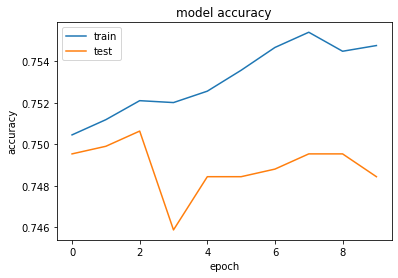

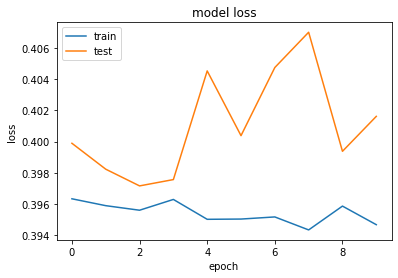

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

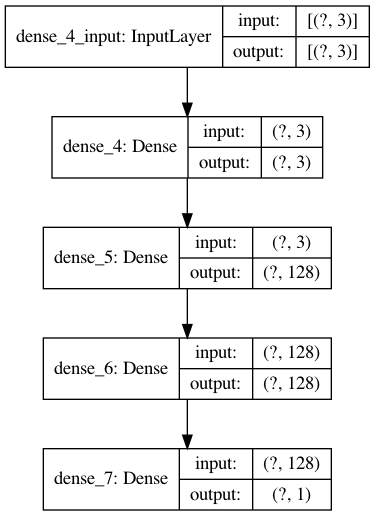

In [26]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96
)